In [402]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
%matplotlib inline

## 10.1 1d Self-Organizing Map for 2d data

In [109]:
data = np.hstack((np.random.uniform(0, 1, (1000,1)), np.random.uniform(0, 2, (1000,1))))

In [302]:
def make_prototypes(data, K, dim=2):
    data_mean = np.mean(data, axis=0)

    pca = PCA()
    pcs = pca.fit_transform(data)
    
    prototypes = np.zeros((K, dim))
    for k in range(K):
        for i in range(dim):
            weighted_pcs = (np.random.rand(data.shape[1])-0.5) * pcs[i]
        prototypes[k] = data_mean + weighted_pcs
        
    return prototypes

In [113]:
ps = make_prototypes(data, 4)

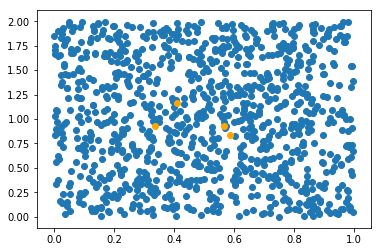

In [114]:
plt.scatter(data[:,0], data[:,1])
plt.scatter(ps[:, 0], ps[:, 1], color='orange')

In [297]:
def h_qp(q, p, sigma):
    return np.exp(-(q-p)**2/(2.*np.square(sigma)))

def kohonen_map_a(data, M, eps, sigma, eps_min = 1E-6):
    ws = make_prototypes(data, M)
    while eps>eps_min:
        ws_old = ws.copy()
        # Chose a data point
        i = np.random.choice(range(data.shape[0]))
        x = data[i]

        #print("data", data.shape)
        #print("ws", ws.shape)
        # Determine the closest prototype
        dists = cdist(data[i, np.newaxis], ws).T
        i_q = np.argmin(dists)

        # Change Prototypes
        ws += (eps * h_qp(i_q, np.arange(M), sigma) * (x - ws).T).T
        
        sigma = 0.95*sigma
        eps = 0.95*eps
    return ws

In [116]:
ps = kohonen_map_a(data, 4, 0.1, 5)

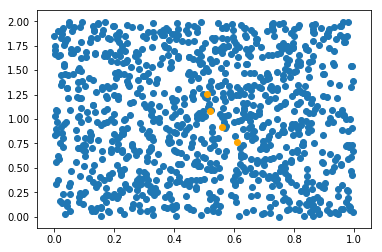

In [117]:
plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.scatter(ps[:, 0], ps[:, 1], color='orange')
plt.show()

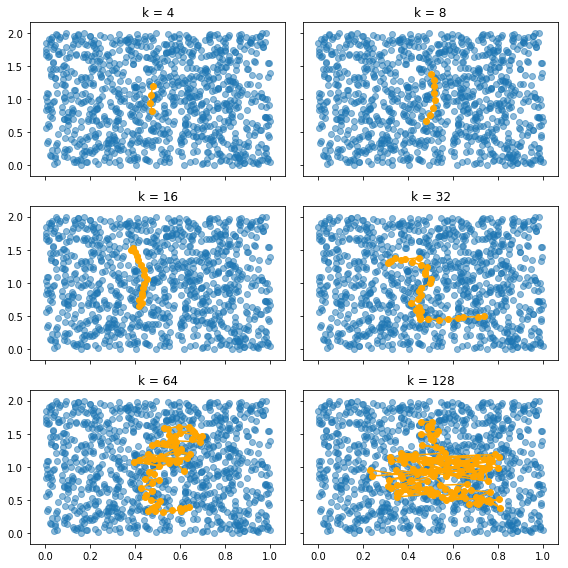

In [124]:
fig, axes = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(8, 8))
for ax, k in zip(axes.flatten(),[4, 8, 16, 32, 64, 128]):
    ps = kohonen_map_a(data, k, 0.3, 15)
    #plt.figure()
    ax.scatter(data[:,0], data[:,1], alpha=0.5)
    ax.scatter(ps[:,0],ps[:,1],color = 'orange')
    ax.plot(ps[:, 0], ps[:, 1], color='orange')
    ax.set_title('k = {}'.format(k))
plt.tight_layout()

## 10.2 1d Self-Organizing Maps for 3d data

In [100]:
spiral = np.genfromtxt('spiral.csv', delimiter=',', skip_header=1)[:,1:]

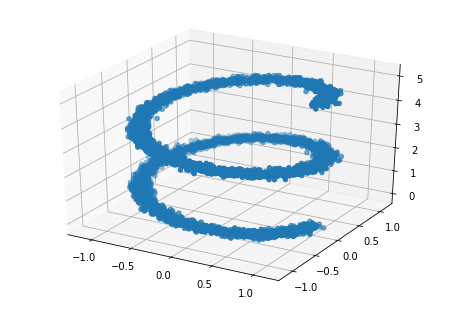

In [101]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(spiral[:,0], spiral[:, 1], spiral[:,2])
plt.show()

In [224]:
def kohonen_map_b(data, M, eps, sigma, eps_min = 1E-6):
    ws = np.hstack((np.zeros(M), np.zeros(M), np.linspace(0, 5, M))).reshape(3,M).T
    while eps>eps_min:
        # Chose a data point
        i = np.random.choice(range(data.shape[0]))
        x = data[i]
        
        # alternative distance calc. as dists only works for 2d
        d = np.linalg.norm(x-ws, axis=1)
        i_q = np.where(d == np.min(d))[0][0]

        # Change Prototypes
        ws += (eps * h_qp(i_q, np.arange(M), sigma) * (x - ws).T).T
        
        sigma = 0.95*sigma
        eps = 0.95*eps
    return ws

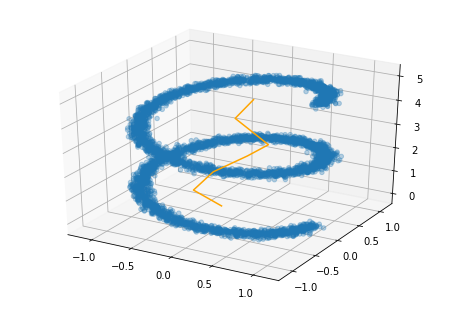

In [225]:
ps = kohonen_map_b(spiral, 8, 1, 10)
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(spiral[:,0], spiral[:, 1], spiral[:,2], alpha=0.3)
ax.plot(ps[:,0], ps[:, 1], ps[:,2], color='orange')
plt.show()

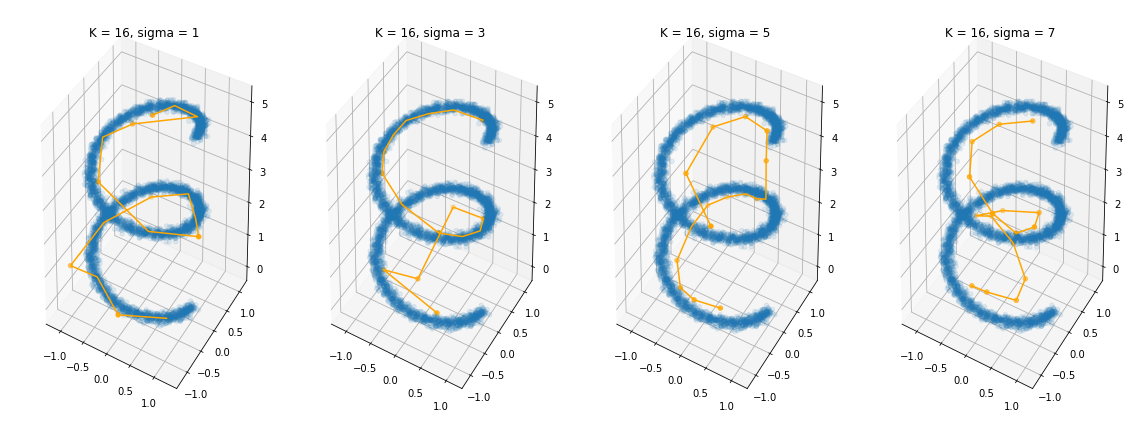

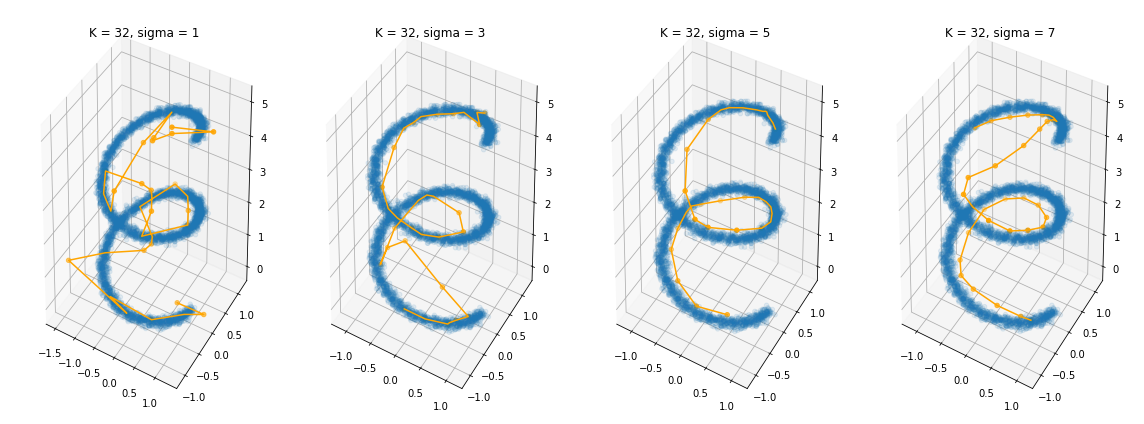

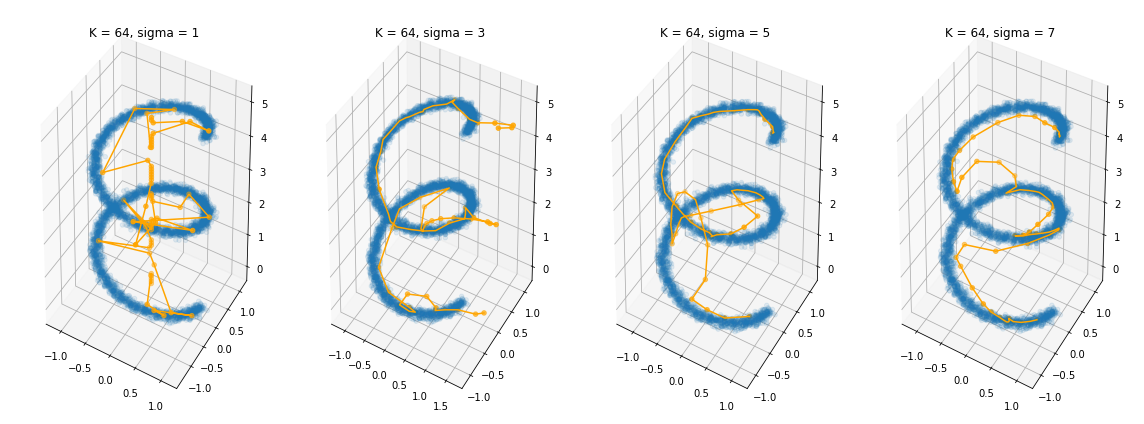

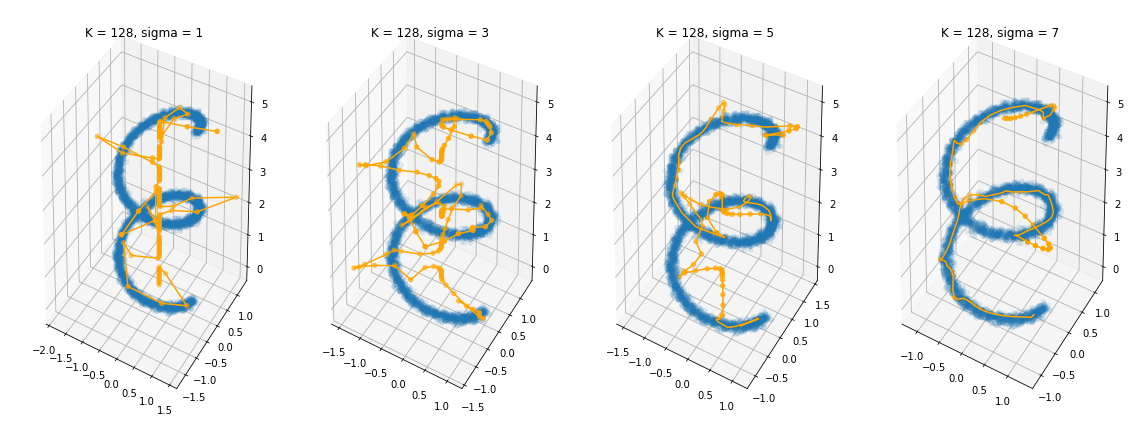

In [406]:
for ax, K in zip(axes.flatten(),[16, 32, 64, 128]):
    j = 0
    gs1 = gridspec.GridSpec(1, 4)
    fig = plt.figure(figsize=(16, 6))
    for sigma in [1,3,5,7]:
        ps  = kohonen_map_b(spiral,K,2,sigma)
        ax  = fig.add_subplot(gs1[j], projection='3d')
        ax.scatter3D(spiral[:,0], spiral[:,1], spiral[:,2], alpha=0.1)
        ax.scatter3D(ps[:,0], ps[:,1], ps[:,2], c='orange')
        ax.plot(ps[:,0], ps[:,1], ps[:,2], c='orange')
        plt.title("K = {}, sigma = {}".format(K,sigma))
        j += 1
    plt.tight_layout()

# 10.3 2d Self-Organizing Maps for 3d data (3 points)

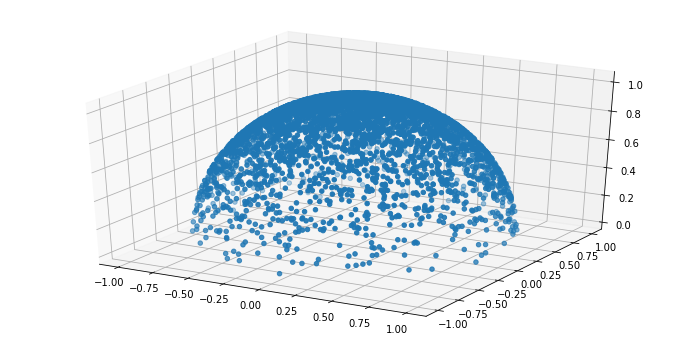

In [326]:
bowl = np.genfromtxt('bowl.csv', delimiter=',', skip_header=1)[:,1:]
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(bowl[:,0], bowl[:,1], bowl[:,2])
plt.show()

In [348]:
def kohonen_map_c(data, M, eps, sigma, eps_min = 1E-6):
    # initialize prototypes:
    ws = make_prototypes(data,M*M,dim=3)
    grid = np.zeros((M*M,2))
    counter = 0   
    for a in range(M):
        for b in range(M):
            grid[counter] = [a,b]
            counter +=1     

    while eps>eps_min:
        #ws_old = ws.copy()
        # Chose a data point
        i = np.random.choice(range(data.shape[0]))
        x = data[i]

        #print("data", data.shape)
        #print("ws", ws.shape)
        # Determine the closest prototype
        dists = cdist(data[i, np.newaxis], ws).T
        i_q = np.argmin(dists)

        # Change Prototypes
        ws += (eps * np.linalg.norm(h_qp(grid[i_q], grid, sigma),axis = 1) * (x - ws).T).T
        
        sigma = 0.95*sigma
        eps = 0.95*eps
    return ws

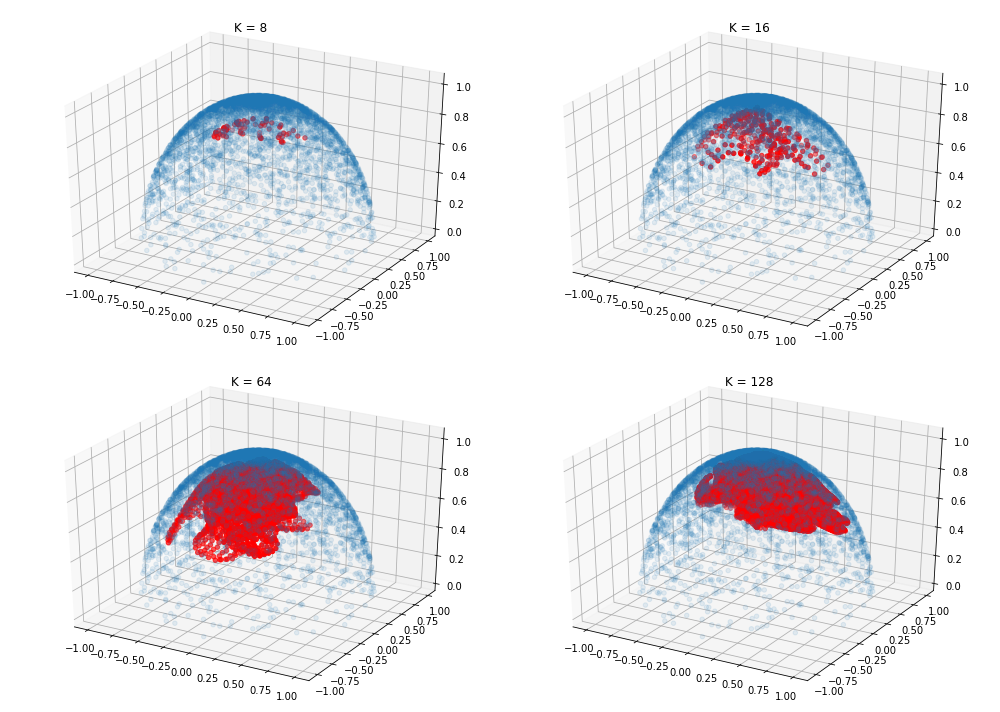

In [413]:
Ks = [8,16,64,128]
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(14, 10))
j = 0
for K in Ks:
    ps = kohonen_map_c(bowl,K,1,15)
    ax = fig.add_subplot(gs[j], projection='3d')
    ax.scatter(bowl[:,0], bowl[:,1], bowl[:,2], alpha=0.1)
    ax.scatter(ps[:,0], ps[:,1], ps[:,2], c='red')
    ax.set_title("K = {}".format(K))
    j +=1
fig.tight_layout()

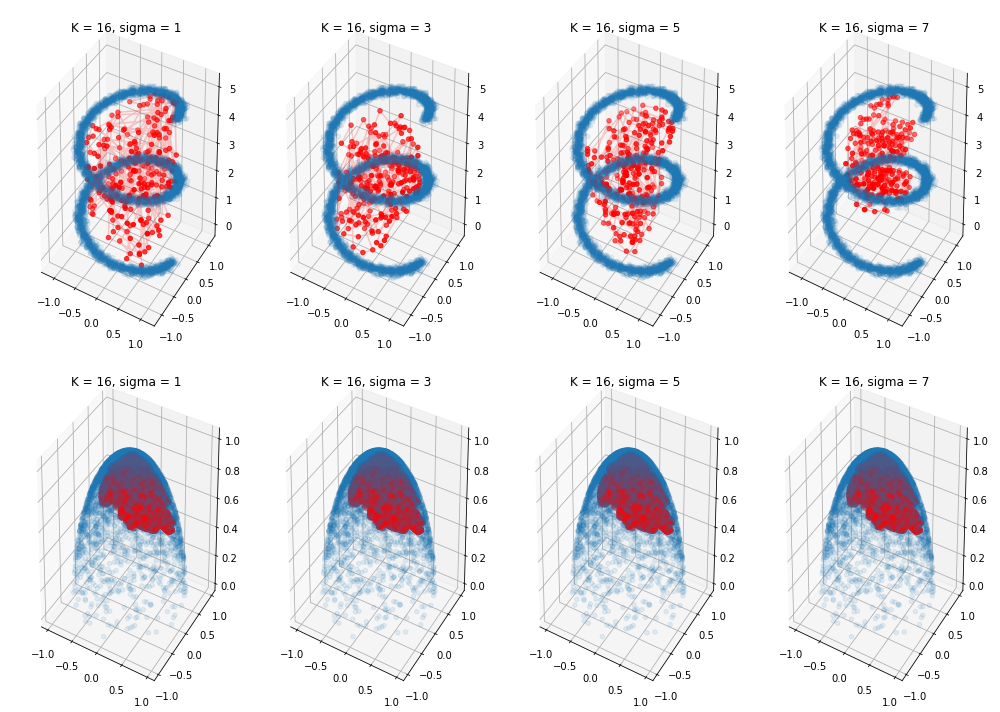

In [417]:
K = 16
gs = gridspec.GridSpec(2, 4)
fig = plt.figure(figsize=(14, 10))
j = 0
for sigma in [1,3,5,7]:
    pc = kohonen_map_c(spiral,K,1,sigma)
    ax = fig.add_subplot(gs[j], projection='3d')
    ax.scatter3D(spiral[:,0], spiral[:,1], spiral[:,2], alpha=0.1)
    ax.scatter3D(pc[:,0], pc[:,1], pc[:,2], c='red')
    ax.plot(pc[:,0], pc[:,1], pc[:,2], c='red',alpha = 0.2)
    ax.set_title("K = {}, sigma = {}".format(K,sigma))
    j +=1
for sigma in [1,3,5,7]:   
    ax = fig.add_subplot(gs[j], projection='3d')
    ax.scatter3D(bowl[:,0], bowl[:,1], bowl[:,2], alpha=0.1)
    ax.scatter3D(ps[:,0], ps[:,1], ps[:,2], c='red')
    ax.plot(ps[:,0], ps[:,1], ps[:,2], c='red',alpha = 0.2)
    ax.set_title("K = {}, sigma = {}".format(K,sigma))
    j += 1 
    
plt.tight_layout()